In [3]:
#import libraries
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy import stats


Get Deal Data (Sales info) and Prod Data (Production Manufacturing info), rename columns and and merge them together.

In [4]:
#get data
# Read CSV file into a DataFrame
deal_df = pd.read_csv('../data_resources/deal_summary_data.csv')
prod_df = pd.read_csv('../data_resources/prod_data.csv')


In [5]:
# Convert 'po_number' column to string data type in both DataFrames
deal_df['po_number'] = deal_df['po_number'].astype(str)
prod_df['po_number'] = prod_df['po_number'].astype(str)
prod_df['COGS PKF Sock domestic SKU Cost'] = prod_df['COGS PKF Sock domestic SKU Cost'].astype(float)


In [6]:
prod_df.shape

(24055, 19)

In [7]:
deal_df.shape

(24258, 14)

In [8]:
#rename prod columns
renamed_prod_df = prod_df.rename(columns={"mfp_quantity": "total_intl_product_quantity",
                                "Total SKU on PO": "total_product_quantity",
                                "hs_client_type": "client_type",
                                "hs_dealtype": "deal_type",
                                "unit_cost": "intl_unit_cost",
                                "fixed_cost" :"fixed_intl_pkg_cost",
                                "COGS int SKU Cost" : "total_intl_unit_cost_dont_use",
                                "COGS int SKU Cost exact" : "total_intl_sku_cost",
                                "COGS PKF Sock domestic SKU Cost" : "total_sku_cost",
                                "submitted_at" : "submitted_to_prod"
                                   })

renamed_prod_df.head()

,po_number,SKU,chassis,total_intl_product_quantity,mfp_product_info,vendor_id,est_ship_date,submitted_to_prod,client_type,deal_type,deal_id,Total SKU DZ on PO,intl_unit_cost,fixed_intl_pkg_cost,total_intl_unit_cost_dont_use,total_intl_sku_cost,total_product_quantity,cost_per_sku,total_sku_cost
0,21936,13.0543182v1,13,NaN,5,3,NaN,10/21/2021,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,30.0,1.45,69.60
1,41358,55.02200109v1,55,NaN,114,1,NaN,11/15/2023,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,19.0,2.56,92.16
2,35481,10.02145777v1,10,NaN,2,3,NaN,4/11/2023,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,15.0,2.85,102.60
3,37268,55.02169096v2,55,NaN,114,3,NaN,6/15/2023,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,24.0,2.93,105.48
4,38645,44.02176365v1,44,NaN,21,4,NaN,8/23/2023,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,20.0,3.00,108.00


In [9]:
# rename deal_df columns
renamed_deal_df = deal_df.rename(columns={"Create Date - Daily": "order_created",
                                "Quantity": "total_deal_quantity",
                                "Deal Stage": "deal_stage",
                                "Deal Type": "deal_type",
                                "Design Difficulty": "design_difficulty",
                                "Revisions": "revisions",
                                "Automation Tools": "automation_tools",
                                "Deal Source CA": "deal_source_ca",
                                "Number of Associated Contacts": "number_of_associated_contacts",
                                "Special Order Type": "special_order_type",
                                "Deal Source CA": "deal_source_ca",
                                "Client Type": "client_type",
                                "Amount in company currency": "amount_in_company_currency"})
renamed_deal_df.head()


,deal_id,po_number,order_created,total_deal_quantity,amount_in_company_currency,client_type,deal_type,special_order_type,deal_stage,automation_tools,revisions,deal_source_ca,number_of_associated_contacts,design_difficulty
0,3951840051,16733,1/6/2021,54.0,0.00,Direct,Existing Business,NaN,Closed and Won,NaN,NaN,NaN,1,NaN
1,3937957448,17532,1/4/2021,90.0,945.00,Distributor,Existing Business,NaN,Closed and Won,NaN,NaN,Pre-Hubspot Contact,2,NaN
2,3938541962,17535,1/4/2021,240.0,4528.98,Direct,Existing Business,NaN,Closed and Won,NaN,NaN,NaN,1,NaN
3,3943305218,17540,1/5/2021,3156.0,NaN,NaN,Existing Business,NaN,Closed and Won,NaN,NaN,NaN,0,NaN
4,3943391716,17541,1/5/2021,1080.0,NaN,NaN,Existing Business,NaN,Closed and Won,NaN,NaN,NaN,0,NaN


In [10]:
#merge csv files

# Merge the DataFrames based on the 'po_number' column
# Now, you can perform the merge operation
deal_prod_merge_df = pd.merge(renamed_deal_df, renamed_prod_df, on='po_number', how="left")
deal_prod_merge_df.head()



,deal_id_x,po_number,order_created,total_deal_quantity,amount_in_company_currency,client_type_x,deal_type_x,special_order_type,deal_stage,automation_tools,...,deal_type_y,deal_id_y,Total SKU DZ on PO,intl_unit_cost,fixed_intl_pkg_cost,total_intl_unit_cost_dont_use,total_intl_sku_cost,total_product_quantity,cost_per_sku,total_sku_cost
0,3951840051,16733,1/6/2021,54.0,0.00,Direct,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3937957448,17532,1/4/2021,90.0,945.00,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3938541962,17535,1/4/2021,240.0,4528.98,Direct,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3943305218,17540,1/5/2021,3156.0,NaN,NaN,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3943391716,17541,1/5/2021,1080.0,NaN,NaN,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Save the merged DataFrame as a new CSV file
deal_prod_merge_df.to_csv('renamed_merged_data.csv', index=False)

Filter the data to only include 2022 and 2023 deal and prod data. Use the date column the order was submitted to be produced "submitted to prod" 

In [12]:
# Convert the 'submitted_to_prod' column to datetime if it's not already
deal_prod_merge_df['submitted_to_prod'] = pd.to_datetime(deal_prod_merge_df['submitted_to_prod'])

# Filter the DataFrame to include only dates in 2022 and 2023
deal_prod_merge_22_23_df = deal_prod_merge_df[deal_prod_merge_df['submitted_to_prod'].dt.year.isin([2022, 2023])]

deal_prod_merge_22_23_df.head()


,deal_id_x,po_number,order_created,total_deal_quantity,amount_in_company_currency,client_type_x,deal_type_x,special_order_type,deal_stage,automation_tools,...,deal_type_y,deal_id_y,Total SKU DZ on PO,intl_unit_cost,fixed_intl_pkg_cost,total_intl_unit_cost_dont_use,total_intl_sku_cost,total_product_quantity,cost_per_sku,total_sku_cost
3651,6324219821,21408,9/28/2021,60.0,832.2,Direct,Existing Business,NaN,Closed and Won,Reorder Button,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32
3802,6312709524,21546,9/27/2021,60.0,630.0,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32
5527,6954332007,23021,11/18/2021,1000.0,6460.0,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,34.0,NaN,NaN,NaN,NaN,400.0,1.96,823.20
5528,6954332007,23021,11/18/2021,1000.0,6460.0,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,600.0,1.88,1150.56
5612,7049269626,23099,11/30/2021,60.0,540.0,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32


In [13]:
# Save the merged DataFrame as a new CSV file
deal_prod_merge_22_23_df.to_csv('renamed_merged_22_23_data.csv', index=False)

deal_prod_merge_22_23_df

,deal_id_x,po_number,order_created,total_deal_quantity,amount_in_company_currency,client_type_x,deal_type_x,special_order_type,deal_stage,automation_tools,...,deal_type_y,deal_id_y,Total SKU DZ on PO,intl_unit_cost,fixed_intl_pkg_cost,total_intl_unit_cost_dont_use,total_intl_sku_cost,total_product_quantity,cost_per_sku,total_sku_cost
3651,6324219821,21408,9/28/2021,60.0,832.20,Direct,Existing Business,NaN,Closed and Won,Reorder Button,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32
3802,6312709524,21546,9/27/2021,60.0,630.00,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32
5527,6954332007,23021,11/18/2021,1000.0,6460.00,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,34.0,NaN,NaN,NaN,NaN,400.0,1.96,823.20
5528,6954332007,23021,11/18/2021,1000.0,6460.00,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,600.0,1.88,1150.56
5612,7049269626,23099,11/30/2021,60.0,540.00,Distributor,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28064,16327565462,42961,12/1/2023,250.0,2015.00,Distributor,Existing Business,NaN,Payment Pending,NaN,...,NaN,NaN,21.0,NaN,NaN,NaN,NaN,250.0,1.96,517.44
28069,16746039960,42973,12/31/2023,360.0,3877.20,Direct,Existing Business,NaN,Closed and Won,Portal Order,...,NaN,NaN,30.0,NaN,NaN,NaN,NaN,360.0,1.96,729.12
28701,10188108889,99999,9/14/2022,60.0,0.00,Direct,Existing Business,NaN,Closed and Won,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32
28702,5869927742,99999,8/6/2021,123.0,30.75,Distributor,New Business,NaN,Closed and Won,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,60.0,2.56,184.32


In [14]:
deal_prod_merge_22_23_df.shape

(20683, 32)

In [15]:
# Assuming your DataFrame is named df
column_names = deal_prod_merge_22_23_df.columns.tolist()

# Print the list of column names
print(column_names)

['deal_id_x', 'po_number', 'order_created', 'total_deal_quantity', 'amount_in_company_currency', 'client_type_x', 'deal_type_x', 'special_order_type', 'deal_stage', 'automation_tools', 'revisions', 'deal_source_ca', 'number_of_associated_contacts', 'design_difficulty', 'SKU', 'chassis', 'total_intl_product_quantity', 'mfp_product_info', 'vendor_id', 'est_ship_date', 'submitted_to_prod', 'client_type_y', 'deal_type_y', 'deal_id_y', 'Total SKU DZ on PO', 'intl_unit_cost', 'fixed_intl_pkg_cost', 'total_intl_unit_cost_dont_use', 'total_intl_sku_cost', 'total_product_quantity', 'cost_per_sku', 'total_sku_cost']


Group the information so that orders with multiple products are not double counts. Deal Data is by Order and Prod Data is by Product. 


If PO is unique, then use total quantity, if PO is not unique total units is the sum of total product quantity.
If the deal is not unique, only return the first currency, client type, deal type found.

In [16]:
# Load your data
# df = pd.read_csv('your_file.csv')  # Replace with your file path

# Define the aggregation logic
# Define the aggregation logic with additional columns
aggregations = {
    'deal_id_x': 'first',
    'order_created': 'first',
    'total_deal_quantity': 'sum',
    'amount_in_company_currency': 'first',
    'client_type_x': 'first',
    'deal_type_x': 'first',
    'special_order_type': 'first',
    'deal_stage': 'first',
    'automation_tools': 'first',
    'revisions': 'first',
    'deal_source_ca': 'first',
    'number_of_associated_contacts': 'first',
    'design_difficulty': 'first',
    'SKU': 'first',
    'chassis': 'first',
    'total_intl_product_quantity': 'sum',
    'mfp_product_info': 'first',
    'vendor_id': 'first',
    'est_ship_date': 'first',
    'submitted_to_prod': 'first',
    'client_type_y': 'first',
    'deal_type_y': 'first',
    'deal_id_y': 'first',
    'Total SKU DZ on PO': 'sum',
    'intl_unit_cost': 'first',
    'fixed_intl_pkg_cost': 'first',
    'total_intl_unit_cost_dont_use': 'sum',
    'total_intl_sku_cost': 'sum',
    'total_product_quantity': 'sum',
    'cost_per_sku': 'first',
    'total_sku_cost': 'sum'
}

# Group by PO and aggregate
filtered_deal_prod_summary_df = deal_prod_merge_22_23_df.groupby('po_number').agg(aggregations)

# Create a boolean series to determine if the PO number is duplicated in the original dataframe
is_duplicated = deal_prod_merge_22_23_df['po_number'].duplicated(keep=False)

# Map this series to the grouped dataframe
filtered_deal_prod_summary_df['is_duplicated'] = filtered_deal_prod_summary_df.index.map(is_duplicated)

# Handle total units based on uniqueness of PO
filtered_deal_prod_summary_df['total_deal_quantity'] = filtered_deal_prod_summary_df.apply(
    lambda x: x['total_product_quantity'] if x['is_duplicated'] else deal_prod_merge_22_23_df.loc[deal_prod_merge_22_23_df['po_number'] == x.name, 'total_deal_quantity'].iloc[0], 
    axis=1
)

# Drop the now redundant columns
filtered_deal_prod_summary_df = filtered_deal_prod_summary_df.drop(columns=['total_product_quantity', 'is_duplicated'])

# Reset index if needed
filtered_deal_prod_summary_df = filtered_deal_prod_summary_df.reset_index()

filtered_deal_prod_summary_df.head()




,po_number,deal_id_x,order_created,total_deal_quantity,amount_in_company_currency,client_type_x,deal_type_x,special_order_type,deal_stage,automation_tools,...,client_type_y,deal_type_y,deal_id_y,Total SKU DZ on PO,intl_unit_cost,fixed_intl_pkg_cost,total_intl_unit_cost_dont_use,total_intl_sku_cost,cost_per_sku,total_sku_cost
0,21408,6324219821,9/28/2021,60.0,832.2,Direct,Existing Business,None,Closed and Won,Reorder Button,...,None,None,NaN,5.0,NaN,NaN,0.0,0.0,2.56,184.32
1,21546,6312709524,9/27/2021,60.0,630.0,Distributor,Existing Business,None,Closed and Won,None,...,None,None,NaN,5.0,NaN,NaN,0.0,0.0,2.56,184.32
2,23021,6954332007,11/18/2021,1000.0,6460.0,Distributor,Existing Business,None,Closed and Won,None,...,None,None,NaN,84.0,NaN,NaN,0.0,0.0,1.96,1973.76
3,23099,7049269626,11/30/2021,60.0,540.0,Distributor,Existing Business,None,Closed and Won,None,...,None,None,NaN,5.0,NaN,NaN,0.0,0.0,2.56,184.32
4,23341,7229722885,12/12/2021,720.0,4456.8,Distributor,Existing Business,None,Closed and Won,None,...,None,None,NaN,60.0,NaN,NaN,0.0,0.0,1.91,1398.12


In [17]:
# Save the merged filtered summary DataFrame as a new CSV file

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# write out csv file
filtered_deal_prod_summary_df.to_csv('filtered_deal_prod_summary_data.csv', index=False)

# Reset the display format to the default
pd.options.display.float_format = None


In [18]:
# bring back csv to filtered_deal_prod_summary_df - after additional cleaning 
cleaned_deal_prod_summary_df = pd.read_csv('filtered_deal_prod_summary_data.csv')

cleaned_deal_prod_summary_df.shape

(16831, 31)

Generate Summary Statistics from the Merged and Filtered Data for revenue, costs and quantity data.

In [19]:
# create summary statistics dataframe to hold results of these preliminary summary stats - for both years combined - to get some whole-group numbers, etc.
summary_stats_full_df = pd.DataFrame(columns=['Statistic', 'Column', 'Value'])

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# create list of column names
columns = ['total_deal_quantity', 
           'amount_in_company_currency', 
           'number_of_associated_contacts',
           'total_intl_product_quantity',
           'Total SKU DZ on PO',
           'total_intl_sku_cost',
           'cost_per_sku',
           'total_sku_cost'
             ]

# Iterate over the column names
for column_name in columns:
    # Perform summary statistics
    count = cleaned_deal_prod_summary_df[column_name].count()
    sum_value = cleaned_deal_prod_summary_df[column_name].sum()
    mean_value = cleaned_deal_prod_summary_df[column_name].mean()
    median_value = cleaned_deal_prod_summary_df[column_name].median()
    min_value = cleaned_deal_prod_summary_df[column_name].min()
    max_value = cleaned_deal_prod_summary_df[column_name].max()
    std_value = cleaned_deal_prod_summary_df[column_name].std()
    q1 = cleaned_deal_prod_summary_df[column_name].quantile(0.25)
    q3 = cleaned_deal_prod_summary_df[column_name].quantile(0.75)

    # Create a new DataFrame with the summary statistics
    summary_mid_df = pd.DataFrame({'Statistic': ['Count', 'Sum', 'Mean', 'Median', 'Min', 'Max', 'Std', 'Q1', 'Q3'],
                                   'Column': [column_name, column_name, column_name, column_name, column_name, column_name, column_name, column_name, column_name],
                                   'Value': [count, sum_value, mean_value, median_value, min_value, max_value, std_value, q1, q3]})

    # Concatenate the new DataFrame with the summary_stats_full_df DataFrame
    summary_stats_full_df = pd.concat([summary_stats_full_df, summary_mid_df], ignore_index=True)

  # Save the merged DataFrame as a new CSV file
summary_stats_full_df.to_csv('summary_stats_full.csv', index=False)

# Print the summary dataframe
print(summary_stats_full_df)

# Reset the display format to the default
pd.options.display.float_format = None



   Statistic               Column      Value
0      Count  total_deal_quantity   16831.00
1        Sum  total_deal_quantity 5329389.00
2       Mean  total_deal_quantity     316.64
3     Median  total_deal_quantity     150.00
4        Min  total_deal_quantity       0.00
..       ...                  ...        ...
67       Min       total_sku_cost       1.80
68       Max       total_sku_cost   43086.72
69       Std       total_sku_cost    1228.65
70        Q1       total_sku_cost     294.36
71        Q3       total_sku_cost     752.64

[72 rows x 3 columns]


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1529344734.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_stats_full_df = pd.concat([summary_stats_full_df, summary_mid_df], ignore_index=True)


In [20]:
# Assuming you have a DataFrame called 'df' and a column called 'column_name'
value = cleaned_deal_prod_summary_df.loc[0, 'submitted_to_prod']
data_type = type(value)

print(data_type)

<class 'str'>


Generate Summary Statistics from the Merged and Filtered Data for revenue, costs and quantity data 2022.

In [21]:
# summary stats for 2022 only - based on submitted_to_prod_column

# convert the submitted_to_prod from timestamp to datetime 
cleaned_deal_prod_summary_df['submitted_to_prod'] = pd.to_datetime(cleaned_deal_prod_summary_df['submitted_to_prod'])

# create summary statistics dataframe to hold results of these preliminary summary stats - for 2022 - to get some whole-group numbers, etc.
summary_stats_2022_df = pd.DataFrame(columns=['Statistic', 'Column', 'Value'])

filtered_deal_prod_2022_df = cleaned_deal_prod_summary_df[cleaned_deal_prod_summary_df['submitted_to_prod'].dt.year == 2022]

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# create list of column names
columns = ['total_deal_quantity', 
           'amount_in_company_currency', 
           'number_of_associated_contacts',
           'total_intl_product_quantity',
           'Total SKU DZ on PO',
           'cost_per_sku',
           'total_sku_cost'
             ]

# Iterate over the column names
for column_name in columns:
    # Perform summary statistics
    count = filtered_deal_prod_2022_df[column_name].count()
    sum_value = filtered_deal_prod_2022_df[column_name].sum()
    mean_value = filtered_deal_prod_2022_df[column_name].mean()
    median_value = filtered_deal_prod_2022_df[column_name].median()
    min_value = filtered_deal_prod_2022_df[column_name].min()
    max_value = filtered_deal_prod_2022_df[column_name].max()
    std_value = filtered_deal_prod_2022_df[column_name].std()
    q1 = filtered_deal_prod_2022_df[column_name].quantile(0.25)
    q3 = filtered_deal_prod_2022_df[column_name].quantile(0.75)

    # Create a new DataFrame with the summary statistics
    summary_2022_df = pd.DataFrame({'Statistic': ['Count', 'Sum', 'Mean', 'Median', 'Min', 'Max', 'Std', 'Q1', 'Q3'],
                                   'Column': [column_name, column_name, column_name, column_name, column_name, column_name, column_name, column_name, column_name],
                                   'Value': [count, sum_value, mean_value, median_value, min_value, max_value, std_value, q1, q3]})

    # Concatenate the new DataFrame with the summary_stats_full_df DataFrame
    summary_stats_2022_df = pd.concat([summary_stats_2022_df, summary_2022_df], ignore_index=True)

  # Save the merged DataFrame as a new CSV file
summary_stats_2022_df.to_csv('summary_stats_2022.csv', index=False)

# Print the summary dataframe
print(summary_stats_2022_df)

# Reset the display format to the default
pd.options.display.float_format = None


   Statistic               Column      Value
0      Count  total_deal_quantity    8085.00
1        Sum  total_deal_quantity 2677472.00
2       Mean  total_deal_quantity     331.17
3     Median  total_deal_quantity     150.00
4        Min  total_deal_quantity       0.00
..       ...                  ...        ...
58       Min       total_sku_cost      91.52
59       Max       total_sku_cost   43086.72
60       Std       total_sku_cost    1266.39
61        Q1       total_sku_cost     294.36
62        Q3       total_sku_cost     776.88

[63 rows x 3 columns]


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1881183303.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_stats_2022_df = pd.concat([summary_stats_2022_df, summary_2022_df], ignore_index=True)


Generate Summary Statistics from the Merged and Filtered Data for revenue, costs and quantity data 2023.

In [22]:
# summary stats for 2023 only - based on submitted_to_prod_column

# convert the submitted_to_prod from timestamp to datetime 
cleaned_deal_prod_summary_df['submitted_to_prod'] = pd.to_datetime(cleaned_deal_prod_summary_df['submitted_to_prod'])

# create summary statistics dataframe to hold results of these preliminary summary stats - for 2023 - to get some whole-group numbers, etc.
summary_stats_2023_df = pd.DataFrame(columns=['Statistic', 'Column', 'Value'])

filtered_deal_prod_2023_df = cleaned_deal_prod_summary_df[cleaned_deal_prod_summary_df['submitted_to_prod'].dt.year == 2023]

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# create list of column names
columns = ['total_deal_quantity', 
           'amount_in_company_currency', 
           'number_of_associated_contacts',
           'total_intl_product_quantity',
           'Total SKU DZ on PO',
           'cost_per_sku',
           'total_sku_cost'
             ]

# Iterate over the column names
for column_name in columns:
    # Perform summary statistics
    count = filtered_deal_prod_2023_df[column_name].count()
    sum_value = filtered_deal_prod_2023_df[column_name].sum()
    mean_value = filtered_deal_prod_2023_df[column_name].mean()
    median_value = filtered_deal_prod_2023_df[column_name].median()
    min_value = filtered_deal_prod_2023_df[column_name].min()
    max_value = filtered_deal_prod_2023_df[column_name].max()
    std_value = filtered_deal_prod_2023_df[column_name].std()
    q1 = filtered_deal_prod_2023_df[column_name].quantile(0.25)
    q3 = filtered_deal_prod_2023_df[column_name].quantile(0.75)

    # Create a new DataFrame with the summary statistics
    summary_2023_df = pd.DataFrame({'Statistic': ['Count', 'Sum', 'Mean', 'Median', 'Min', 'Max', 'Std', 'Q1', 'Q3'],
                                   'Column': [column_name, column_name, column_name, column_name, column_name, column_name, column_name, column_name, column_name],
                                   'Value': [count, sum_value, mean_value, median_value, min_value, max_value, std_value, q1, q3]})

    # Concatenate the new DataFrame with the summary_stats_full_df DataFrame
    summary_stats_2023_df = pd.concat([summary_stats_2023_df, summary_2023_df], ignore_index=True)

  # Save the merged DataFrame as a new CSV file
summary_stats_2023_df.to_csv('summary_stats_2023.csv', index=False)

# Print the summary dataframe
print(summary_stats_2023_df)

# Reset the display format to the default
pd.options.display.float_format = None


   Statistic               Column      Value
0      Count  total_deal_quantity    8746.00
1        Sum  total_deal_quantity 2651917.00
2       Mean  total_deal_quantity     303.21
3     Median  total_deal_quantity     125.00
4        Min  total_deal_quantity       0.00
..       ...                  ...        ...
58       Min       total_sku_cost       1.80
59       Max       total_sku_cost   32000.00
60       Std       total_sku_cost    1192.63
61        Q1       total_sku_cost     276.48
62        Q3       total_sku_cost     747.12

[63 rows x 3 columns]


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1052694521.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_stats_2023_df = pd.concat([summary_stats_2023_df, summary_2023_df], ignore_index=True)


Calculate the Gross Margin and add a new column to the summary data frame to store the results.

In [23]:
# create function - for gross margin assignment
def calculate_gm(r, c):
    if r != 0:
        gm = (r - c) / r
    else:
        gm = 0
    return gm

In [24]:
# New operations - to avoid dividing by zero :

# full summary dataframe - assign gross margin
cleaned_deal_prod_summary_df["gross_margin"] = cleaned_deal_prod_summary_df.apply(lambda row: calculate_gm(row["amount_in_company_currency"], row["total_sku_cost"]), axis=1)

# Fill NaN values in "gross_margin" column with 0
cleaned_deal_prod_summary_df['gross_margin'].fillna(0, inplace=True)

# 2022 dataframe - assign gross margin
filtered_deal_prod_2022_df["gross_margin"] = filtered_deal_prod_2022_df.apply(lambda row: calculate_gm(row["amount_in_company_currency"], row["total_sku_cost"]), axis=1)

# Fill NaN values in "gross_margin" column with 0
filtered_deal_prod_2022_df['gross_margin'].fillna(0, inplace=True)

# 2023 dataframe - assign gross margin
filtered_deal_prod_2023_df["gross_margin"] = filtered_deal_prod_2023_df.apply(lambda row: calculate_gm(row["amount_in_company_currency"], row["total_sku_cost"]), axis=1)

# Fill NaN values in "gross_margin" column with 0
filtered_deal_prod_2023_df['gross_margin'].fillna(0, inplace=True)


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1186279960.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df["gross_margin"] = filtered_deal_prod_2022_df.apply(lambda row: calculate_gm(row["amount_in_company_currency"], row["total_sku_cost"]), axis=1)
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1186279960.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df['gross_margin'].fillna(0, inplace=True)
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1186279960.py:16: Settin

In [25]:
  # Save the merged DataFrame as a new CSV file
filtered_deal_prod_2022_df.to_csv('filtered_deal_prod_2022.csv', index=False)

Group by the client type and generate summary statistics of revenue, quantity, costs, and gross margin for each in 2022.

In [26]:
# GroupBy Client_type_x Summary Stats 2022

# Define the group by column
group_by_column = "client_type_x"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_client_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_client_sum_2022_df.columns = grouped_client_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_client_sum_2022_df = grouped_client_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_client_sum_2022_df.to_csv('grouped_summary_2022_client.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_client_sum_2022_df.head()


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\21850043.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,client_type_x,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,B2C,981.900000,981.900,981.90,981.9,981.90,NaN,60.000000,60.0,60.0,...,184.32,184.32,184.32,NaN,0.812282,0.812282,0.812282,0.812282,0.812282,NaN
1,Direct,3110.948946,1900.800,53074.98,0.0,6788090.60,3756.871469,287.337305,150.0,6396.0,...,10312.68,151.20,1475650.80,772.325643,0.764245,0.781828,0.932318,-10.352000,1667.583233,0.256198
2,Distributor,2477.750016,1324.695,151035.11,0.0,14167774.59,4623.862172,346.660780,150.0,25085.0,...,43086.72,91.52,4402898.40,1408.370160,0.676561,0.687593,0.947046,-3.236384,3869.252631,0.100266
3,Wholesale,2669.549286,1750.100,53780.80,0.0,485857.97,4310.204331,371.038462,199.0,10500.0,...,15978.24,184.32,150881.64,1301.680132,0.678456,0.686594,0.864371,0.000000,123.478980,0.099956


Group by the client type and generate summary statistics of revenue, quantity, costs, and gross margin for each in 2023.

In [27]:
# GroupBy Client_type_x Summary Stats 2023

# Define the group by column
group_by_column = "client_type_x"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_client_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_client_sum_2023_df.columns = grouped_client_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_client_sum_2023_df = grouped_client_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_client_sum_2023_df.to_csv('grouped_summary_2023_client.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_client_sum_2023_df.head()


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\371110733.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,client_type_x,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,Direct,2911.442227,1756.90,137620.0,0.0,7.176705e+06,4221.286397,235.701420,120.0,20000.0,...,30460.80,3.60,1465249.71,886.536058,0.772953,0.789803,0.949503,-10.320000,1905.330021,0.346568
1,Distributor,2550.127918,1377.24,96543.7,0.0,1.566034e+07,4206.029857,329.202214,150.0,20135.0,...,32000.00,1.80,4710149.96,1292.035739,0.683572,0.700995,0.979429,-8.457158,4198.500837,0.194530
2,Wholesale,2709.169568,1350.00,26200.0,0.0,3.765746e+05,3909.792768,352.179856,125.0,5000.0,...,8577.36,152.64,112683.68,1194.654791,0.627870,0.703438,0.799574,-9.275840,87.273964,0.849157


Group by the business type for Existing and New Business and generate summary statistics of revenue, quantity, costs, and gross margin for each in 2022.

In [28]:
# GroupBy deal_type_x Summary Stats 2022

# Define the group by column
group_by_column = "deal_type_x"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_dealtype_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_dealtype_sum_2022_df.columns = grouped_dealtype_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_dealtype_sum_2022_df = grouped_dealtype_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_dealtype_sum_2022_df.to_csv('grouped_summary_2022_dealtype.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_dealtype_sum_2022_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\3524834538.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,deal_type_x,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,Existing Business,2687.457308,1542.00,151035.11,0.0,17218538.97,4684.998398,349.005462,150.0,25085.0,...,43086.72,122.76,4976833.12,1362.254481,0.693410,0.701794,0.936176,-3.236384,4443.368197,0.105344
1,New Business,2521.080793,1613.52,44700.00,0.0,4227852.49,3125.186893,262.996422,120.0,10000.0,...,13744.08,91.52,1053511.16,789.906852,0.726632,0.763596,0.947046,-10.352000,1218.561143,0.291215


In [29]:
# GroupBy deal_type_x Summary Stats 2023

# Define the group by column
group_by_column = "deal_type_x"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_dealtype_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_dealtype_sum_2023_df.columns = grouped_dealtype_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_dealtype_sum_2023_df = grouped_dealtype_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_dealtype_sum_2023_df.to_csv('grouped_summary_2023_dealtype.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_dealtype_sum_2023_df.head()


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\4110215136.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,deal_type_x,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,Existing Business,2746.122582,1600.0,137620.0,0.0,1.917068e+07,4312.504078,326.212720,150.0,20000.0,...,30460.8,1.8,5303107.00,1185.941212,0.702907,0.711094,0.979429,-10.054187,4906.995673,0.242656
1,New Business,2289.881867,1520.4,96543.7,0.0,4.034772e+06,3749.069419,211.784458,120.0,20135.0,...,32000.0,3.6,982250.31,1205.827900,0.727597,0.765627,0.979429,-10.320000,1282.754034,0.362034


In [30]:
# GroupBy chassis Summary Stats 2022

# Define the group by column
group_by_column = "chassis"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_chassis_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_chassis_sum_2022_df.columns = grouped_chassis_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_chassis_sum_2022_df = grouped_chassis_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_chassis_sum_2022_df.to_csv('grouped_summary_2022_chassis.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_chassis_sum_2022_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\4286649069.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,chassis,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,10.0,2634.761890,1556.0,151035.11,0.0,17323559.43,4440.633333,329.302920,150.0,25085.0,...,43086.72,122.88,4848102.36,1266.446147,0.702422,0.711761,0.936176,-10.352000,4619.126462,0.166363
1,11.0,1563.877500,1052.0,10272.00,642.6,31277.55,2088.969982,173.700000,90.0,1600.0,...,3369.60,203.76,9863.04,688.075600,0.685180,0.678588,0.797857,0.620693,13.703602,0.054337
2,12.0,3261.666228,1849.2,60910.00,0.0,544698.26,5558.377930,417.215569,240.0,12000.0,...,18151.92,122.76,144775.80,1551.868812,0.714844,0.734725,0.852702,0.000000,119.378965,0.104920
3,13.0,4300.806923,1629.6,29075.46,1330.0,111820.98,6179.321913,840.692308,244.0,10000.0,...,12024.00,313.20,33967.80,2426.090261,0.747570,0.770892,0.817323,0.471472,19.436815,0.081224
4,14.0,4415.360000,3529.4,9389.52,1521.6,35322.88,3175.203871,700.000000,680.0,1600.0,...,2366.40,313.20,9594.72,866.206169,0.738830,0.753916,0.801017,0.653630,5.910641,0.056916


In [31]:
# GroupBy chassis Summary Stats 2023

# Define the group by column
group_by_column = "chassis"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_chassis_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_chassis_sum_2023_df.columns = grouped_chassis_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_chassis_sum_2023_df = grouped_chassis_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_chassis_sum_2023_df.to_csv('grouped_summary_2023_chassis.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_chassis_sum_2023_df.head()


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1292538113.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,chassis,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,10.0,2626.250230,1520.57,137620.00,0.0,17259716.51,4181.997698,315.479610,150.0,20135.0,...,30624.96,114.48,4715492.12,1169.509711,0.707089,0.719845,0.949503,-10.320000,4646.990569,0.287958
1,11.0,1873.879310,1347.00,9917.59,526.8,54342.50,1835.833807,184.586207,120.0,850.0,...,1883.52,203.76,15489.00,400.177972,0.692383,0.690710,0.810083,0.544875,20.079121,0.048803
2,12.0,3086.262014,1797.60,25228.00,0.0,428990.42,4084.892610,376.561151,200.0,4760.0,...,6065.52,160.56,109303.16,970.266606,0.720244,0.741161,0.847830,0.000000,100.113863,0.103310
3,13.0,1962.907143,1684.00,5892.00,0.0,27480.70,1285.976015,319.571429,222.0,1200.0,...,1890.72,341.28,7415.76,407.524604,0.700307,0.755796,0.797340,0.000000,9.804298,0.204777
4,14.0,2560.902000,1734.00,5452.91,1639.2,12804.51,1641.914508,272.000000,240.0,480.0,...,1038.24,341.28,2540.52,297.817667,0.795540,0.803183,0.829145,0.749414,3.977701,0.029989


In [32]:
# GroupBy vendor_id Summary Stats 2022

# Define the group by column
group_by_column = "vendor_id"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_vendor_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_vendor_sum_2022_df.columns = grouped_vendor_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_vendor_sum_2022_df = grouped_vendor_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_vendor_sum_2022_df.to_csv('grouped_summary_2022_vendor.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_vendor_sum_2022_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1400147068.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,vendor_id,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,1.0,2843.782882,1660.8,151035.11,0.0,7806184.01,5742.466596,368.375091,154.5,25085.0,...,43086.72,122.88,2016348.48,1683.005377,0.731196,0.730297,0.947046,-3.236384,2007.865531,0.126859
1,2.0,0.000000,0.0,0.00,0.0,0.00,NaN,240.000000,240.0,240.0,...,468.72,468.72,468.72,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,3.0,2856.114864,1762.0,57200.00,0.0,9947848.07,3966.864175,363.362618,200.0,10000.0,...,17052.48,122.76,2984734.20,1109.947515,0.669783,0.676765,0.921255,-10.352000,2332.853936,0.209368
3,4.0,1947.755628,1126.0,32305.00,0.0,3533228.71,2371.545479,220.552370,120.0,6500.0,...,10555.92,185.76,997435.08,653.976526,0.710708,0.712268,0.926867,0.000000,1289.224466,0.075420
4,5.0,3793.986552,2675.0,13110.00,0.0,110025.61,2771.138404,0.000000,0.0,0.0,...,2648.00,91.52,22423.60,544.769315,0.767689,0.792494,0.874163,0.000000,22.262987,0.162928


In [33]:
# GroupBy vendor_id Summary Stats 2023

# Define the group by column
group_by_column = "vendor_id"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_vendor_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_vendor_sum_2023_df.columns = grouped_vendor_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_vendor_sum_2023_df = grouped_vendor_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_vendor_sum_2023_df.to_csv('grouped_summary_2023_vendor.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_vendor_sum_2023_df.head()


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\2995014507.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,vendor_id,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,1.0,2860.175431,1800.0,137620.00,0.0,1.031665e+07,4751.617259,345.051289,200.0,20135.0,...,30624.96,114.48,2505648.52,1240.149036,0.736753,0.743358,0.949503,-9.275840,2657.467549,0.277099
1,3.0,2800.428138,1520.4,79234.12,0.0,7.818795e+06,4210.770603,341.642320,125.0,10000.0,...,17234.40,136.80,2334344.16,1228.871392,0.686694,0.686694,0.908199,-10.054187,1917.935171,0.221074
2,4.0,1997.948992,1172.0,52400.00,0.0,4.073818e+06,2701.588236,222.221677,120.0,10000.0,...,17134.20,108.00,1214908.80,816.552314,0.680093,0.693918,0.880968,-10.320000,1386.710081,0.301911
3,5.0,5795.709730,2550.0,67825.00,0.0,2.144413e+05,11998.397233,0.000000,0.0,0.0,...,32000.00,91.52,66204.88,5423.325397,0.692454,0.774000,0.921601,-0.045943,25.620798,0.234654
4,10.0,2925.584481,1927.5,22970.43,0.0,7.899078e+05,3006.918376,0.000000,0.0,0.0,...,6102.42,1.80,166976.99,727.525998,0.753227,0.792094,0.979429,-4.680000,203.371222,0.362343


In [34]:
# GroupBy design_difficulty Summary Stats 2022

# Define the group by column
group_by_column = "design_difficulty"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_design_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_design_sum_2022_df.columns = grouped_design_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_design_sum_2022_df = grouped_design_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_design_sum_2022_df.to_csv('grouped_summary_2022_design.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_design_sum_2022_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\3064494977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,design_difficulty,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,Hand Sanitizer,933.600000,933.6,933.60,933.6,933.60,NaN,120.000000,120.0,120.0,...,340.56,340.56,340.56,NaN,0.635219,0.635219,0.635219,0.635219,0.635219,NaN
1,High,2781.388958,1749.0,19988.97,585.6,133506.67,3807.031884,336.375000,165.0,3000.0,...,5798.76,184.32,36756.12,1059.041254,0.716431,0.720833,0.852702,0.486799,34.388699,0.074237
2,High Res Preview,2108.070601,1442.4,34050.24,0.0,4102305.39,2305.709993,233.061151,120.0,5000.0,...,10395.60,91.52,1121674.64,619.160067,0.711361,0.718731,0.901880,-1.524932,1384.308731,0.092469
3,Knitted Mockup Tool,1958.477647,1444.2,9508.19,830.4,66588.24,1805.000082,195.529412,120.0,1200.0,...,2314.92,184.32,16302.48,483.951539,0.763591,0.766754,0.829677,0.653325,25.962099,0.039377
4,Low,2614.849276,1484.4,71519.28,0.0,4657046.56,3888.456480,320.313307,144.0,15000.0,...,22818.24,151.20,1304242.44,1110.487902,0.705428,0.710384,0.947046,-0.069041,1256.367620,0.078961


In [35]:
# GroupBy design_difficulty Summary Stats 2023

# Define the group by column
group_by_column = "design_difficulty"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_design_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_design_sum_2023_df.columns = grouped_design_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_design_sum_2023_df = grouped_design_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_design_sum_2023_df.to_csv('grouped_summary_2023_design.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_design_sum_2023_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\954462894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,design_difficulty,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,High,4796.607143,2175.805,96543.70,0.0,470067.50,10416.759148,664.838384,240.0,20135.0,...,30624.96,152.64,131660.90,3234.464413,0.704365,0.722459,0.879526,-0.045943,69.732147,0.140670
1,High Res Preview,2351.860905,1466.440,52427.00,0.0,3922903.99,3432.170736,248.628897,120.0,10300.0,...,17134.20,5.40,1005253.76,932.945967,0.723732,0.735438,0.969143,-8.457158,1207.184459,0.240029
2,Low,2523.745288,1517.100,79234.12,0.0,6347219.40,3778.997548,285.953877,121.0,12000.0,...,18757.44,3.60,1719221.13,994.226164,0.705204,0.715939,0.976000,-10.320000,1773.589255,0.308069
3,Medium,3097.549021,1891.375,32830.98,0.0,1170873.53,4121.331569,342.978836,177.5,5404.0,...,10773.60,3.60,308077.52,1205.863817,0.724704,0.727069,0.979429,0.000000,273.938261,0.084556
4,Not Rated,2859.661407,1575.000,18300.00,398.7,386054.29,3217.879102,316.629630,120.0,3000.0,...,5171.04,140.64,104554.04,860.181021,0.716126,0.717430,0.822129,0.555206,96.677017,0.056331


In [36]:
# GroupBy deal_source_ca Summary Stats 2022

# Define the group by column
group_by_column = "deal_source_ca"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_dealsource_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_dealsource_sum_2022_df.columns = grouped_dealsource_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_dealsource_sum_2022_df = grouped_dealsource_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_dealsource_sum_2022_df.to_csv('grouped_summary_2022_dealsource.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_dealsource_sum_2022_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1027431421.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,deal_source_ca,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,AL Leads,1119.600000,1119.60,1155.60,1083.60,2239.20,50.911688,120.000000,120.0,120.0,...,363.00,340.56,703.56,15.867476,0.685796,0.685796,0.685877,0.685714,1.371592,0.000115
1,AM Outbound,4158.220000,4158.22,4158.22,4158.22,4158.22,NaN,360.000000,360.0,360.0,...,1021.68,1021.68,1021.68,NaN,0.754299,0.754299,0.754299,0.754299,0.754299,NaN
2,ASI Connect,3731.968889,1185.60,24312.52,585.60,33587.72,7734.410522,409.333333,120.0,2654.0,...,4596.48,184.32,7625.88,1418.017156,0.692929,0.685246,0.810942,0.601090,6.236362,0.065642
3,Client Referral,2453.047390,1326.80,54488.80,0.00,4361518.26,3705.904957,335.295276,150.0,10500.0,...,16488.60,122.76,1328144.40,1116.358659,0.681883,0.697953,0.893996,-3.236384,1212.387526,0.124198
4,CommonSku,2375.714771,1151.25,47937.34,585.60,258952.91,4759.735627,321.440367,120.0,8100.0,...,13141.44,184.32,80235.12,1353.789780,0.684521,0.686600,0.828188,0.391162,74.612843,0.063790


In [37]:
# GroupBy deal_source_ca Summary Stats 2023

# Define the group by column
group_by_column = "deal_source_ca"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_dealsource_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_dealsource_sum_2023_df.columns = grouped_dealsource_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_dealsource_sum_2023_df = grouped_dealsource_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_dealsource_sum_2023_df.to_csv('grouped_summary_2023_dealsource.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_dealsource_sum_2023_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\501917372.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,deal_source_ca,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,ASI Connect,1405.127143,1339.20,3388.5,175.0,19671.78,822.047931,141.357143,110.0,450.0,...,1188.72,3.60,5943.12,293.686902,0.722649,0.702177,0.979429,0.641087,10.117085,0.081678
1,Client Referral,2776.527746,1600.00,137620.0,0.0,4398019.95,5207.510577,357.579545,150.0,20000.0,...,32000.00,3.60,1302889.72,1531.731386,0.690276,0.702068,0.979429,-2.402057,1093.397094,0.114636
2,CommonSku,1982.635839,1268.69,14352.0,0.0,271621.11,2248.053217,217.839416,120.0,2400.0,...,4148.64,91.52,81159.62,628.733500,0.679461,0.702479,0.834796,0.000000,93.086117,0.121305
3,Direct Traffic,2725.865274,1744.54,27510.0,0.0,1643696.76,3036.859439,247.520730,120.0,5250.0,...,8218.08,3.60,379764.81,720.700421,0.724773,0.770568,0.976000,-10.320000,437.038103,0.592216
4,ESP Central,2211.397500,1050.00,18278.0,409.2,53073.54,3646.144838,275.500000,120.0,2600.0,...,6128.64,152.64,17255.04,1225.569848,0.673758,0.669328,0.763907,0.605536,16.170188,0.038261


In [38]:
# GroupBy automation_tools Summary Stats 2022

# Define the group by column
group_by_column = "automation_tools"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_automationtools_sum_2022_df = filtered_deal_prod_2022_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_automationtools_sum_2022_df.columns = grouped_automationtools_sum_2022_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_automationtools_sum_2022_df = grouped_automationtools_sum_2022_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_automationtools_sum_2022_df.to_csv('grouped_summary_2022_automationtools.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_automationtools_sum_2022_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1797207124.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df[list_of_columns] = filtered_deal_prod_2022_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,automation_tools,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,3D Builder,1976.774923,1449.445,8968.08,585.60,256980.74,1620.545371,166.223077,120.0,950.0,...,1739.88,184.32,55421.08,312.664026,0.774209,0.782584,0.835770,0.652166,100.647212,0.039431
1,Intake 1.0,3812.030000,3812.030,3812.03,3812.03,3812.03,NaN,360.000000,360.0,360.0,...,896.52,896.52,896.52,NaN,0.764818,0.764818,0.764818,0.764818,0.764818,NaN
2,Intake 2.0 Edward,2544.934348,1593.870,26492.57,585.60,995069.33,2554.245405,241.012788,120.0,4000.0,...,6894.72,151.20,231777.36,586.384651,0.758601,0.770157,0.900204,0.382013,296.613149,0.058074
3,Intake 2.0 Jacob,832.200000,832.200,832.20,832.20,832.20,NaN,60.000000,60.0,60.0,...,184.32,184.32,184.32,NaN,0.778515,0.778515,0.778515,0.778515,0.778515,NaN
4,Intake 3.0,2176.759132,1474.680,20939.88,168.00,1253813.26,2103.649973,194.185764,120.0,2400.0,...,4072.32,184.32,285541.76,451.556829,0.759972,0.776573,0.901880,-0.097143,437.743923,0.066260


In [39]:
# GroupBy automation_tools Summary Stats 2023

# Define the group by column
group_by_column = "automation_tools"

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Define the list of columns for summary statistics
list_of_columns = ["amount_in_company_currency", "total_deal_quantity", "total_sku_cost", "gross_margin"]

# Convert columns to numeric data types - dont change!
filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')

# Perform group by and summary statistics on selected columns
grouped_automationtools_sum_2023_df = filtered_deal_prod_2023_df.groupby(group_by_column)[list_of_columns].agg(['mean', 'median', 'max', 'min', 'sum', 'std'])

# Reset the column names to remove the multi-level index
grouped_automationtools_sum_2023_df.columns = grouped_automationtools_sum_2023_df.columns.map('_'.join)

# Reset the index and move "client_type_x" column to the first position
grouped_automationtools_sum_2023_df = grouped_automationtools_sum_2023_df.reset_index()

# Save the summary DataFrame as a new CSV file with right-justified numbers
grouped_automationtools_sum_2023_df.to_csv('grouped_summary_2023_automationtools.csv', index=False, float_format='%.2f')

# Reset the display format to the default
pd.options.display.float_format = None

# Print the first 5 records
grouped_automationtools_sum_2023_df.head()

C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\2793870370.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df[list_of_columns] = filtered_deal_prod_2023_df[list_of_columns].apply(pd.to_numeric, errors='coerce')


,automation_tools,amount_in_company_currency_mean,amount_in_company_currency_median,amount_in_company_currency_max,amount_in_company_currency_min,amount_in_company_currency_sum,amount_in_company_currency_std,total_deal_quantity_mean,total_deal_quantity_median,total_deal_quantity_max,...,total_sku_cost_max,total_sku_cost_min,total_sku_cost_sum,total_sku_cost_std,gross_margin_mean,gross_margin_median,gross_margin_max,gross_margin_min,gross_margin_sum,gross_margin_std
0,3D Builder,2278.752006,1520.4,27214.29,0.0,749709.41,2820.091746,192.115502,120.0,2800.0,...,5692.32,126.00,167036.68,642.311895,0.767413,0.779209,0.908199,-0.461321,252.478911,0.093933
1,Intake 2.0 Edward,935.100000,935.1,1182.00,688.2,1870.20,349.169329,90.000000,90.0,120.0,...,294.36,203.76,498.12,64.063874,0.727444,0.727444,0.750964,0.703923,1.454888,0.033263
2,Intake 3.0,2203.185252,1520.4,17575.05,569.7,742473.43,2221.701309,190.721068,120.0,2750.0,...,4435.20,122.88,162837.32,484.613809,0.772180,0.777137,0.938297,0.549852,260.224571,0.048808
3,Intake 4.0 Logged In,2228.965874,1520.4,24350.00,385.8,956226.36,2349.607300,202.920746,120.0,3000.0,...,5180.64,122.88,225699.21,523.081599,0.742264,0.754301,0.925148,0.477836,318.431144,0.068221
4,Intake 4.0 Logged Out,2116.635371,1520.4,17928.00,469.2,484709.50,1996.247062,157.296943,120.0,1800.0,...,4548.96,122.88,103583.92,492.191159,0.785052,0.788279,0.949503,0.631068,179.776952,0.044982


Calculate the total Costs for each year and display in a graph with changes between the years and how they compare to revenue.

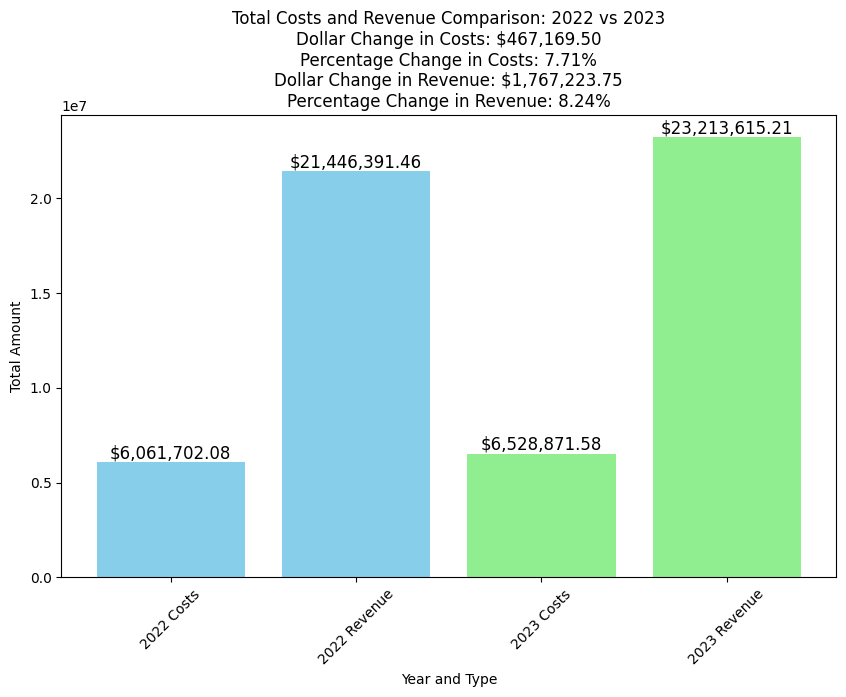

In [40]:
#What were the total costs compared to 2022 to 2023?- KH
import matplotlib.pyplot as plt
import locale
import os

# Set the locale to format numbers as currency
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Data
years = ['2022 Costs', '2022 Revenue', '2023 Costs', '2023 Revenue']

# Calculate total costs and total revenue for each year
total_cost_2022 = (filtered_deal_prod_2022_df["total_sku_cost"] + filtered_deal_prod_2022_df["total_intl_sku_cost"]).sum()
total_cost_2023 = (filtered_deal_prod_2023_df["total_sku_cost"] + filtered_deal_prod_2023_df["total_intl_sku_cost"]).sum()
total_revenue_2022 = (filtered_deal_prod_2022_df["amount_in_company_currency"]).sum()
total_revenue_2023 = (filtered_deal_prod_2023_df["amount_in_company_currency"]).sum()

# Calculate the change in dollar amount and percentage for total costs
dollar_change_costs = total_cost_2023 - total_cost_2022
percentage_change_costs = (dollar_change_costs / total_cost_2022) * 100

# Calculate the change in dollar amount and percentage for total revenue
dollar_change_revenue = total_revenue_2023 - total_revenue_2022
percentage_change_revenue = (dollar_change_revenue / total_revenue_2022) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    years,
    [total_cost_2022, total_revenue_2022, total_cost_2023, total_revenue_2023],
    color=['skyblue', 'skyblue', 'lightgreen', 'lightgreen']
)
plt.xlabel('Year and Type')
plt.ylabel('Total Amount')
plt.title(f'Total Costs and Revenue Comparison: 2022 vs 2023\n'
          f'Dollar Change in Costs: {locale.currency(dollar_change_costs, grouping=True)}\n'
          f'Percentage Change in Costs: {percentage_change_costs:.2f}%\n'
          f'Dollar Change in Revenue: {locale.currency(dollar_change_revenue, grouping=True)}\n'
          f'Percentage Change in Revenue: {percentage_change_revenue:.2f}%')

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             locale.currency(height, grouping=True), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Save plot in data resources folder
plot_filename = os.path.join('..', 'data_resources', 'cost_revenue_comparison_bar_chart_plot.png')
plt.savefig(plot_filename)

plt.show()



#What was the total order size by price break year to year? (Bins and Slice!)- KH


Calculate and display monthly costs and revenue in 2022 and 2023. 

In [41]:
# Corrected approach to modifying DataFrame columns
filtered_deal_prod_2022_df.loc[:, 'submitted_to_prod'] = pd.to_datetime(filtered_deal_prod_2022_df['submitted_to_prod'])
filtered_deal_prod_2023_df.loc[:, 'submitted_to_prod'] = pd.to_datetime(filtered_deal_prod_2023_df['submitted_to_prod'])

filtered_deal_prod_2022_df.loc[:, 'month'] = filtered_deal_prod_2022_df['submitted_to_prod'].dt.month
filtered_deal_prod_2022_df.loc[:, 'year'] = filtered_deal_prod_2022_df['submitted_to_prod'].dt.year

filtered_deal_prod_2023_df.loc[:, 'month'] = filtered_deal_prod_2023_df['submitted_to_prod'].dt.month
filtered_deal_prod_2023_df.loc[:, 'year'] = filtered_deal_prod_2023_df['submitted_to_prod'].dt.year


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\2878514549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df.loc[:, 'month'] = filtered_deal_prod_2022_df['submitted_to_prod'].dt.month
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\2878514549.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df.loc[:, 'year'] = filtered_deal_prod_2022_df['submitted_to_prod'].dt.year
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\2878

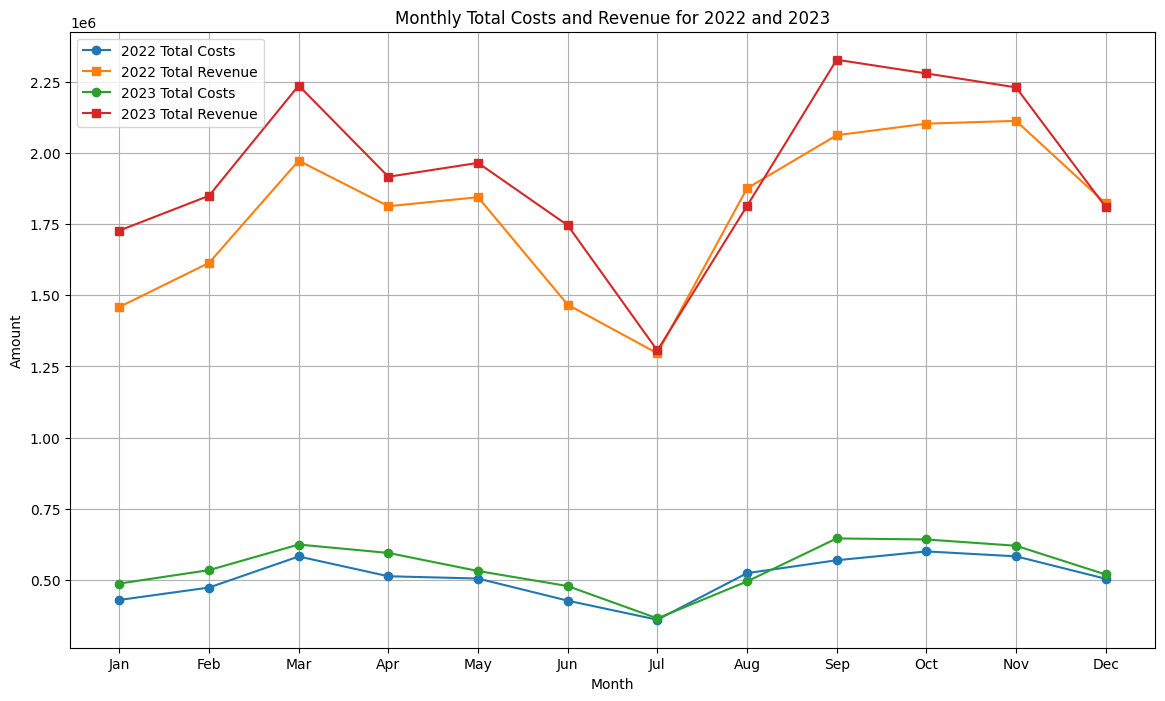

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Assuming filtered_deal_prod_2022_df and filtered_deal_prod_2023_df are your DataFrames
# Here you should have filtered_deal_prod_2022_df and filtered_deal_prod_2023_df defined

# Your function definition appears correct, so we will use it as is
def calculate_monthly_totals(df):
    # Correcting the summing and resetting index steps
    monthly_costs = df.groupby(['year', 'month'])[['total_sku_cost', 'total_intl_sku_cost']].sum().sum(axis=1).reset_index()
    monthly_costs.columns = ['year', 'month', 'Total Costs']  # Renaming columns appropriately
    
    monthly_revenue = df.groupby(['year', 'month'])[['amount_in_company_currency']].sum().reset_index()
    monthly_revenue.columns = ['year', 'month', 'Total Revenue']  # Renaming columns appropriately

    # Merging on 'year' and 'month'
    monthly_totals = pd.merge(monthly_costs, monthly_revenue, on=['year', 'month'])
    return monthly_totals

# Correcting the code to call calculate_monthly_totals for each DataFrame and combining the results
monthly_totals_2022 = calculate_monthly_totals(filtered_deal_prod_2022_df)
monthly_totals_2023 = calculate_monthly_totals(filtered_deal_prod_2023_df)

# Combine the 2022 and 2023 monthly totals into a single DataFrame
monthly_totals = pd.concat([monthly_totals_2022, monthly_totals_2023], ignore_index=True)

# Now, plotting
plt.figure(figsize=(14, 8))
for year in monthly_totals['year'].unique():
    yearly_data = monthly_totals[monthly_totals['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['Total Costs'], marker='o', label=f'{year} Total Costs')
    plt.plot(yearly_data['month'], yearly_data['Total Revenue'], marker='s', label=f'{year} Total Revenue')

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Total Costs and Revenue for 2022 and 2023')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Save plot in data resources folder
plot_filename = os.path.join('..', 'data_resources', 'Monthly_total_costs_revenue_2022_2023_plot.png')
plt.savefig(plot_filename)

# Display plot
plt.show()


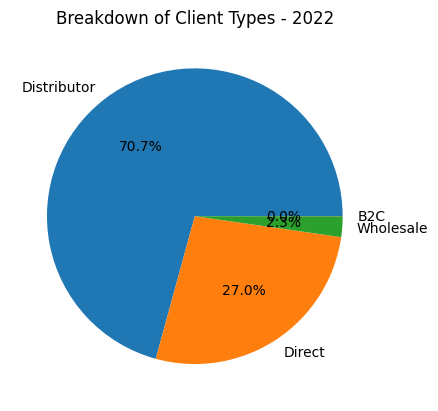

In [43]:
# What was the total client type share in 2022 - Pie chart 

# Count the occurrences of each client type
client_type_counts = filtered_deal_prod_2022_df['client_type_x'].value_counts()

# Create a pie chart
plt.pie(client_type_counts, labels=client_type_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Breakdown of Client Types - 2022')

# Save plot in data resources folder
plot_filename = os.path.join('..', 'data_resources', 'Client_type_pie_2022.png')
plt.savefig(plot_filename)

# Display the chart
plt.show()

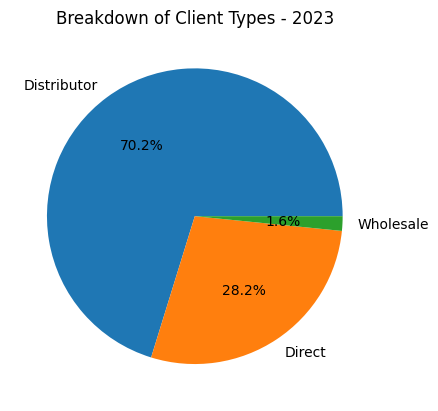

In [44]:
# What was the total client type share in 2023 - Pie chart 

# Count the occurrences of each client type
client_type_counts = filtered_deal_prod_2023_df['client_type_x'].value_counts()

# Create a pie chart
plt.pie(client_type_counts, labels=client_type_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Breakdown of Client Types - 2023')

# Save plot in data resources folder
plot_filename = os.path.join('..', 'data_resources', 'Client_type_pie_2023.png')
plt.savefig(plot_filename)

# Display the chart
plt.show()

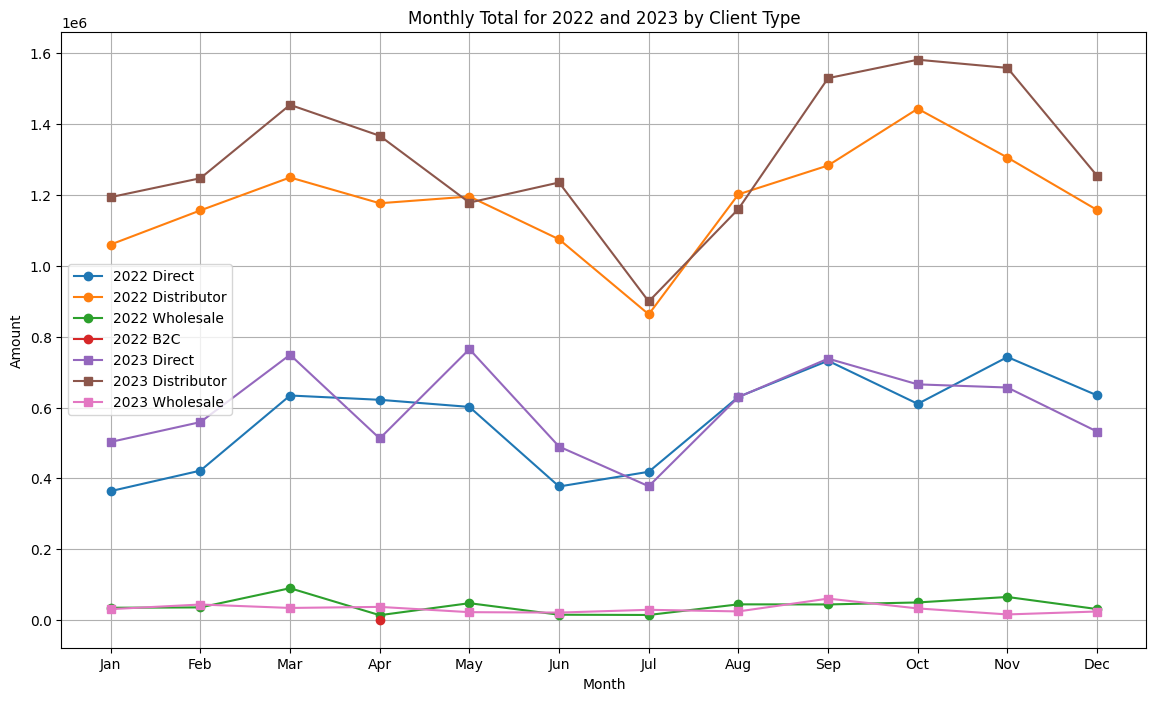

In [45]:
# Plot - revenue by month and year - group by client_type_x

# Create Function
def calculate_monthly_totals(df):
    # Correcting the summing and resetting index steps
    monthly_totals = df.groupby(['year', 'month', 'client_type_x'])[['amount_in_company_currency']].sum().reset_index()
    monthly_totals.columns = ['year', 'month', 'client_type', 'Total']

    return monthly_totals

# Correcting the code to call calculate_monthly_totals for each DataFrame and combining the results
monthly_totals_2022 = calculate_monthly_totals(filtered_deal_prod_2022_df)
monthly_totals_2023 = calculate_monthly_totals(filtered_deal_prod_2023_df)

# Now, plotting
plt.figure(figsize=(14, 8))
for year in monthly_totals_2022['year'].unique():
    yearly_data = monthly_totals_2022[monthly_totals_2022['year'] == year]
    for client_type in yearly_data['client_type'].unique():
        client_data = yearly_data[yearly_data['client_type'] == client_type]
        plt.plot(client_data['month'], client_data['Total'], marker='o', label=f'{year} {client_type}')

for year in monthly_totals_2023['year'].unique():
    yearly_data = monthly_totals_2023[monthly_totals_2023['year'] == year]
    for client_type in yearly_data['client_type'].unique():
        client_data = yearly_data[yearly_data['client_type'] == client_type]
        plt.plot(client_data['month'], client_data['Total'], marker='s', label=f'{year} {client_type}')

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Total for 2022 and 2023 by Client Type')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Save plot in data resources folder
plot_filename = os.path.join('..', 'data_resources', 'Monthly_total_by_client_type_line_graph.png')
plt.savefig(plot_filename)

plt.show()

In [46]:
print("test")

test


In [60]:
#What was the total order size by price break year to year? (Bins and Slice!)- KH

bins = [0, 29, 59, 119, 239, 359, 479, 719, 1199, 2399, 4999, 9999, 500000]
bin_labels = ['0-29', '30-59', '60-119', '120-239', '240-359', '360-479', '480-719', '720-1199', '1200-2399', '2400-4999', '5000-9999', '>10000']



In [48]:
# For 2022 DataFrame
filtered_deal_prod_2022_df['quantity_bin'] = pd.cut(filtered_deal_prod_2022_df['total_deal_quantity'], bins=bins, labels=bin_labels, include_lowest=True)
# For 2023 DataFrame
filtered_deal_prod_2023_df['quantity_bin'] = pd.cut(filtered_deal_prod_2023_df['total_deal_quantity'], bins=bins, labels=bin_labels, include_lowest=True)


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\995952984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2022_df['quantity_bin'] = pd.cut(filtered_deal_prod_2022_df['total_deal_quantity'], bins=bins, labels=bin_labels, include_lowest=True)
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\995952984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_deal_prod_2023_df['quantity_bin'] = pd.cut(filtered_deal_prod_2023_df['total_deal_quantity'], bins=bins, 

In [49]:
# Distribution for 2022
quantity_distribution_2022 = filtered_deal_prod_2022_df['quantity_bin'].value_counts().sort_index()

# Distribution for 2023
quantity_distribution_2023 = filtered_deal_prod_2023_df['quantity_bin'].value_counts().sort_index()

# Display the distributions
print("Quantity Distribution for 2022:")
print(quantity_distribution_2022)
print("\nQuantity Distribution for 2023:")
print(quantity_distribution_2023)


Quantity Distribution for 2022:
quantity_bin
0-29           42
30-59           8
60-119       2169
120-239      2616
240-359      1346
360-479       472
480-719       700
720-1199      375
1200-2399     235
2400-4999      87
5000-9999      24
>10000         11
Name: count, dtype: int64

Quantity Distribution for 2023:
quantity_bin
0-29          313
30-59         507
60-119       2059
120-239      2668
240-359      1276
360-479       489
480-719       694
720-1199      401
1200-2399     219
2400-4999      85
5000-9999      26
>10000          9
Name: count, dtype: int64


In [50]:
# For 2022 DataFrame
grouped_2022 = filtered_deal_prod_2022_df.groupby(['client_type_x', 'quantity_bin']).size().unstack(fill_value=0)

# For 2023 DataFrame
grouped_2023 = filtered_deal_prod_2023_df.groupby(['client_type_x', 'quantity_bin']).size().unstack(fill_value=0)


C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1998057181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_2022 = filtered_deal_prod_2022_df.groupby(['client_type_x', 'quantity_bin']).size().unstack(fill_value=0)
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\1998057181.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_2023 = filtered_deal_prod_2023_df.groupby(['client_type_x', 'quantity_bin']).size().unstack(fill_value=0)


In [51]:
print("Quantity Distribution by Client Type for 2022:")
print(grouped_2022)

print("\nQuantity Distribution by Client Type for 2023:")
print(grouped_2023)


Quantity Distribution by Client Type for 2022:
quantity_bin   0-29  30-59  60-119  120-239  240-359  360-479  480-719  \
client_type_x                                                            
B2C               0      0       1        0        0        0        0   
Direct           16      2     511      752      403      145      178   
Distributor      25      6    1632     1796      909      312      503   
Wholesale         1      0      25       68       34       14       19   

quantity_bin   720-1199  1200-2399  2400-4999  5000-9999  >10000  
client_type_x                                                     
B2C                   0          0          0          0       0  
Direct               93         58         21          3       0  
Distributor         270        170         65         21      10  
Wholesale            12          7          1          0       1  

Quantity Distribution by Client Type for 2023:
quantity_bin   0-29  30-59  60-119  120-239  240-359  360-

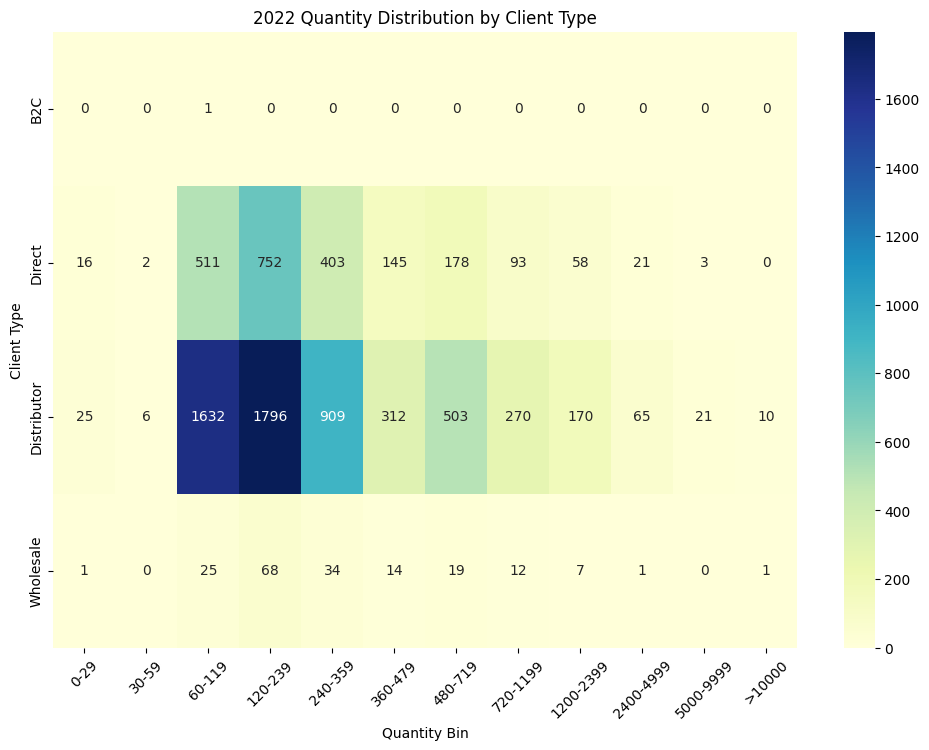

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 2022 data
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_2022, annot=True, cmap="YlGnBu", fmt="d")
plt.title('2022 Quantity Distribution by Client Type')
plt.ylabel('Client Type')
plt.xlabel('Quantity Bin')
plt.xticks(rotation=45)
plt.show()


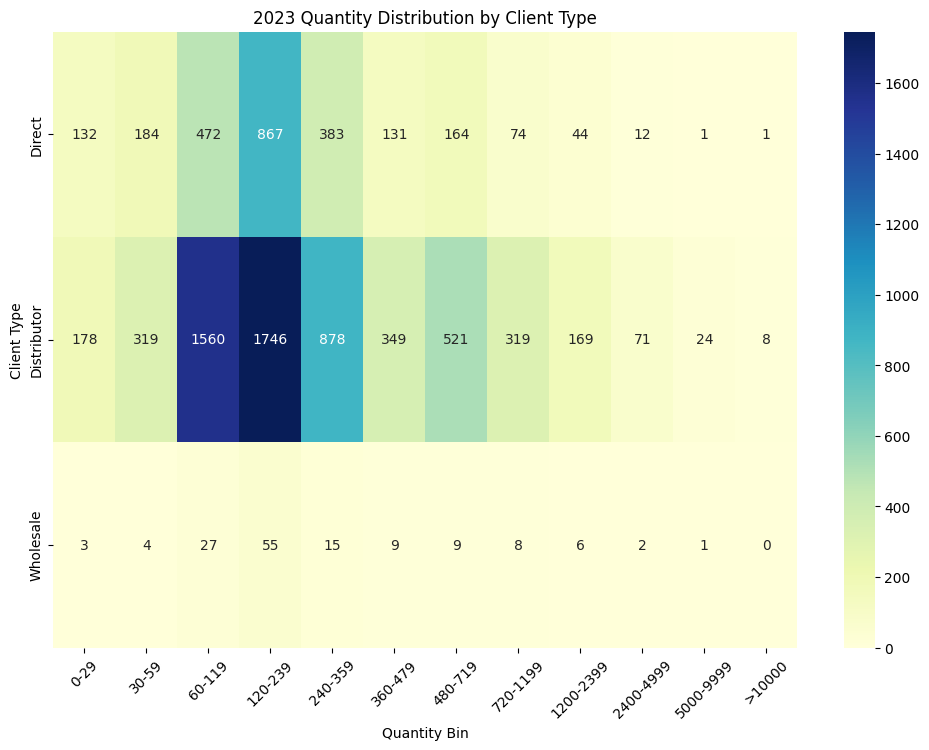

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 2022 data
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_2023, annot=True, cmap="YlGnBu", fmt="d")
plt.title('2023 Quantity Distribution by Client Type')
plt.ylabel('Client Type')
plt.xlabel('Quantity Bin')
plt.xticks(rotation=45)
plt.show()


In [54]:
# Calculate overall margin for 2022
overall_margin_2022 = filtered_deal_prod_2022_df['gross_margin'].mean()

# Calculate overall margin for 2023
overall_margin_2023 = filtered_deal_prod_2023_df['gross_margin'].mean()

print(f"Overall Margin for 2022: {overall_margin_2022:.2f}")
print(f"Overall Margin for 2023: {overall_margin_2023:.2f}")

Overall Margin for 2022: 0.70
Overall Margin for 2023: 0.71


In [56]:
# Margins by client type for 2022
margin_by_client_type_2022 = filtered_deal_prod_2022_df.groupby('client_type_x')['gross_margin'].mean()

# Margins by client type for 2023
margin_by_client_type_2023 = filtered_deal_prod_2023_df.groupby('client_type_x')['gross_margin'].mean()

print("Margins by Client Type for 2022:")
print(margin_by_client_type_2022)
print("\nMargins by Client Type for 2023:")
print(margin_by_client_type_2023)



Margins by Client Type for 2022:
client_type_x
B2C            0.812282
Direct         0.764245
Distributor    0.676561
Wholesale      0.678456
Name: gross_margin, dtype: float64

Margins by Client Type for 2023:
client_type_x
Direct         0.772953
Distributor    0.683572
Wholesale      0.627870
Name: gross_margin, dtype: float64


In [57]:
# For 2022 DataFrame
margin_by_bin_and_client_2022 = filtered_deal_prod_2022_df.groupby(['client_type_x', 'quantity_bin'])['gross_margin'].mean().unstack()

# For 2023 DataFrame
margin_by_bin_and_client_2023 = filtered_deal_prod_2023_df.groupby(['client_type_x', 'quantity_bin'])['gross_margin'].mean().unstack()



C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\4197426025.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  margin_by_bin_and_client_2022 = filtered_deal_prod_2022_df.groupby(['client_type_x', 'quantity_bin'])['gross_margin'].mean().unstack()
C:\Users\KatreeceHattaway\AppData\Local\Temp\ipykernel_1456\4197426025.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  margin_by_bin_and_client_2023 = filtered_deal_prod_2023_df.groupby(['client_type_x', 'quantity_bin'])['gross_margin'].mean().unstack()


In [58]:
print("Margins by Bin and Client Type for 2022:")
print(margin_by_bin_and_client_2022)

print("\nMargins by Bin and Client Type for 2023:")
print(margin_by_bin_and_client_2023)


Margins by Bin and Client Type for 2022:
quantity_bin       0-29     30-59    60-119   120-239   240-359   360-479  \
client_type_x                                                               
B2C                 NaN       NaN  0.812282       NaN       NaN       NaN   
Direct         0.830519  0.402886  0.768375  0.751851  0.773543  0.771946   
Distributor    0.716148  0.661874  0.670564  0.679949  0.677899  0.664004   
Wholesale      0.793403       NaN  0.690762  0.668999  0.672200  0.688407   

quantity_bin    480-719  720-1199  1200-2399  2400-4999  5000-9999    >10000  
client_type_x                                                                 
B2C                 NaN       NaN        NaN        NaN        NaN       NaN  
Direct         0.769917  0.767101   0.778776   0.792044   0.533555       NaN  
Distributor    0.666037  0.703254   0.685959   0.700606   0.695498  0.679646  
Wholesale      0.689961  0.694201   0.689967   0.459750        NaN  0.702901  

Margins by Bin and Cl

In [59]:
import plotly.figure_factory as ff

# Visualization for 2022
fig_2022 = ff.create_annotated_heatmap(z=margin_by_bin_and_client_2022.values, 
                                       x=margin_by_bin_and_client_2022.columns.tolist(), 
                                       y=margin_by_bin_and_client_2022.index.tolist(), 
                                       annotation_text=margin_by_bin_and_client_2022.round(2).values)
fig_2022.update_layout(title='2022 Margins by Bin and Client Type', xaxis=dict(title='Quantity Bin'), yaxis=dict(title='Client Type'))
fig_2022.show()

# Visualization for 2023
fig_2023 = ff.create_annotated_heatmap(z=margin_by_bin_and_client_2023.values, 
                                       x=margin_by_bin_and_client_2023.columns.tolist(), 
                                       y=margin_by_bin_and_client_2023.index.tolist(), 
                                       annotation_text=margin_by_bin_and_client_2023.round(2).values)
fig_2023.update_layout(title='2023 Margins by Bin and Client Type', xaxis=dict(title='Quantity Bin'), yaxis=dict(title='Client Type'))
fig_2023.show()
